# Аналіз модуля №1 (Тест). КН-1 2024

---

## 1. Пакети

In [5]:
# install.packages("tidyverse")

In [9]:
library(tidyverse)
library(readxl)

## 2. Читання документа

In [18]:
path <- "data/test-kn1.xlsx"

In [33]:
test_data <- read_excel(path, sheet = "test") |> slice(1:30)
#correct_data <- read_excel(path, sheet = "correct") |> slice(1:30)


[1] "Q1"  "Q2"  "Q3"  "Q4"  "Q5"  "Q6"  "Q7"  "Q8"  "Q9"  "Q10" "Q11" "Q12"
[13] "Q13" "Q14" "Q15" "Q16" "Q17" "Q18" "Q19" "Q20"

In [49]:
colnames(test_data) <- c("No", "Std", "V", paste0("Q", 1:20))
colnames(test_data)

[1] "No"  "Std" "V"   "Q1"  "Q2"  "Q3"  "Q4"  "Q5"  "Q6"  "Q7"  "Q8"  "Q9" 
[13] "Q10" "Q11" "Q12" "Q13" "Q14" "Q15" "Q16" "Q17" "Q18" "Q19" "Q20"

In [92]:
colnames(test_data)[4:23]

[1] "Q1"  "Q2"  "Q3"  "Q4"  "Q5"  "Q6"  "Q7"  "Q8"  "Q9"  "Q10" "Q11" "Q12"
[13] "Q13" "Q14" "Q15" "Q16" "Q17" "Q18" "Q19" "Q20"

In [98]:
paste0(rep("*", times = length(test_data$Std)), collapse = "")

[1] "******************************"

In [112]:
test1_data <- test_data |>
    mutate(Std = "****** ****") |>
    mutate(V = ifelse(V %% 2 == 0, 2, 1)) |>
    mutate_at(colnames(test_data)[4:23], factor, levels = c("A", "B", "C", "D", "X")) |>
    mutate(across(everything(), ~replace_na(.x, "X")))
head(test1_data)

No,Std,V,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
<dbl>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,****** ****,1,C,B,C,A,D,B,B,...,B,C,C,B,C,A,B,D,A,B
2,****** ****,2,C,B,D,B,A,B,B,...,A,B,A,C,A,C,D,C,B,C
3,****** ****,2,A,B,D,B,D,C,B,...,A,C,C,D,A,B,B,B,B,C
4,****** ****,2,C,A,D,D,B,C,D,...,D,C,A,C,B,B,D,A,B,C
5,****** ****,1,C,C,C,C,B,B,C,...,C,C,C,A,B,A,D,D,B,A
6,****** ****,2,D,B,A,B,B,C,D,...,A,C,D,B,A,D,A,D,D,C


Q1,C
Q2,B
Q3,C
Q4,A
Q5,D
Q6,B
Q7,B
Q8,D
Q9,D
Q10,A
Q11,B


In [185]:
answers_matrix <-  test1_data |> select(Q1:Q20) |> as.matrix()
answers_matrix

Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
C,B,C,A,D,B,B,D,D,A,B,C,C,B,C,A,B,D,A,B
C,B,D,B,A,B,B,C,B,B,A,B,A,C,A,C,D,C,B,C
A,B,D,B,D,C,B,C,A,C,A,C,C,D,A,B,B,B,B,C
C,A,D,D,B,C,D,A,A,C,D,C,A,C,B,B,D,A,B,C
C,C,C,C,B,B,C,A,B,A,C,C,C,A,B,A,D,D,B,A
D,B,A,B,B,C,D,A,D,B,A,C,D,B,A,D,A,D,D,C
C,C,C,C,C,B,B,C,A,A,C,C,C,B,C,B,B,A,A,B
C,B,B,C,C,B,D,A,A,B,C,C,C,B,B,A,C,D,A,B
C,C,D,D,C,C,B,C,A,A,D,C,C,A,B,X,X,X,X,X
B,C,C,C,B,A,B,A,A,A,B,C,C,C,B,B,A,C,C,B


In [193]:
correct_answers <-  test1_data |> select(Q1:Q20) |> as.matrix()

In [194]:
correct_answers_names <- colnames(correct_answers) 

In [195]:
correct_answers <- correct_answers[, 1]
correct_answers

[1] "C" "C" "A" "C" "C" "D" "C" "C" "C" "B" "D" "A" "B" "C" "C" "C" "A" "B" "A"
[20] "C" "D" "A" "D" "B" "D" "C" "C" "D" "C" "C"

In [182]:
typeof(correct_answers)

[1] "character"

In [ ]:
colnames(correct_answers)


In [143]:
mc[,1]

Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9 Q10 Q11 Q12 Q13 Q14 Q15 Q16 Q17 Q18 Q19 Q20 
"C" "B" "C" "A" "D" "B" "B" "D" "D" "A" "B" "C" "C" "B" "C" "A" "B" "D" "A" "B"

In [150]:
m[1,]

Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9 Q10 Q11 Q12 Q13 Q14 Q15 Q16 Q17 Q18 Q19 Q20 
"C" "B" "C" "A" "D" "B" "B" "D" "D" "A" "B" "C" "C" "B" "C" "A" "B" "D" "A" "B"

In [159]:
mc[,1] == m[1,]

Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9  Q10  Q11  Q12  Q13  Q14  Q15  Q16 
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE 
 Q17  Q18  Q19  Q20 
TRUE TRUE TRUE TRUE

In [ ]:
mc[,1] == mc[,1]

In [191]:
answers_matrix[, 1] 
 correct_answers

[1] "C" "C" "A" "C" "C" "D" "C" "C" "C" "B" "D" "A" "B" "C" "C" "C" "A" "B" "A"
[20] "C" "D" "A" "D" "B" "D" "C" "C" "D" "C" "C"

Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9 Q10 Q11 Q12 Q13 Q14 Q15 Q16 Q17 Q18 Q19 Q20 
"C" "B" "C" "A" "D" "B" "B" "D" "D" "A" "B" "C" "C" "B" "C" "A" "B" "D" "A" "B"

In [198]:
final_matrix <- matrix(FALSE, nrow = nrow(m), ncol = ncol(m))

for(i in 1:ncol(answers_matrix)) 
{
    print(i)
    final_matrix[,i] <- answers_matrix[, i] == correct_answers[i]
}

final_matrix

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20


TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE
TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE
TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE


In [227]:
grade <- 15/20
grade
final_grades <- test1_data |> select(1:3) |>
    bind_cols(as.data.frame(final_matrix))
colnames(final_grades) <- colnames(test1_data)

final_grades <- final_grades |>
   mutate_if(is.logical, function(x) {ifelse(x, grade, 0)}) 

final_grades <- final_grades |>
    rowwise() |>
   mutate(Total = sum(across(Q1:Q20), na.rm = T)) 

final_grades

[1] 0.75

No,Std,V,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Total
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,****** ****,1,0.75,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.75,0.00,0.00,0.00,0.75,0.00,2.25
2,****** ****,2,0.75,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.75,0.00,0.75,0.00,0.00,0.00,0.75,4.50
3,****** ****,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.75,0.00,0.75,2.25
4,****** ****,2,0.75,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.75,0.00,0.00,0.00,0.00,0.00,0.75,3.00
5,****** ****,1,0.75,0.75,0.00,0.75,0.00,0.00,0.75,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
6,****** ****,2,0.00,0.00,0.75,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.75,0.00,0.00,0.75,3.00
7,****** ****,1,0.75,0.75,0.00,0.75,0.75,0.00,0.00,...,0.00,0.00,0.00,0.75,0.00,0.00,0.00,0.75,0.00,5.25
8,****** ****,1,0.75,0.00,0.00,0.75,0.75,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.75,0.00,3.75
9,****** ****,1,0.75,0.75,0.00,0.00,0.75,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.75


In [226]:
final_grades |> select(2,24) |> arrange(desc(Total)) |> head(3)

Std,Total
<chr>,<dbl>
****** ****,6.00
****** ****,6.00
****** ****,5.25


In [125]:
mc[1,1] == m[,1]

[1]  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE
[13] FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
[25] FALSE  TRUE  TRUE FALSE  TRUE  TRUE

In [110]:
table(test1_data$V)


 1  2 
14 16 

In [109]:
x <- test1_data |> select(Q1:Q20) |> unlist() |> table() |> prop.table() |> as.data.frame() 
x

Var1,Freq
<fct>,<dbl>
A,0.201666667
B,0.265000000
C,0.315000000
D,0.210000000
X,0.008333333


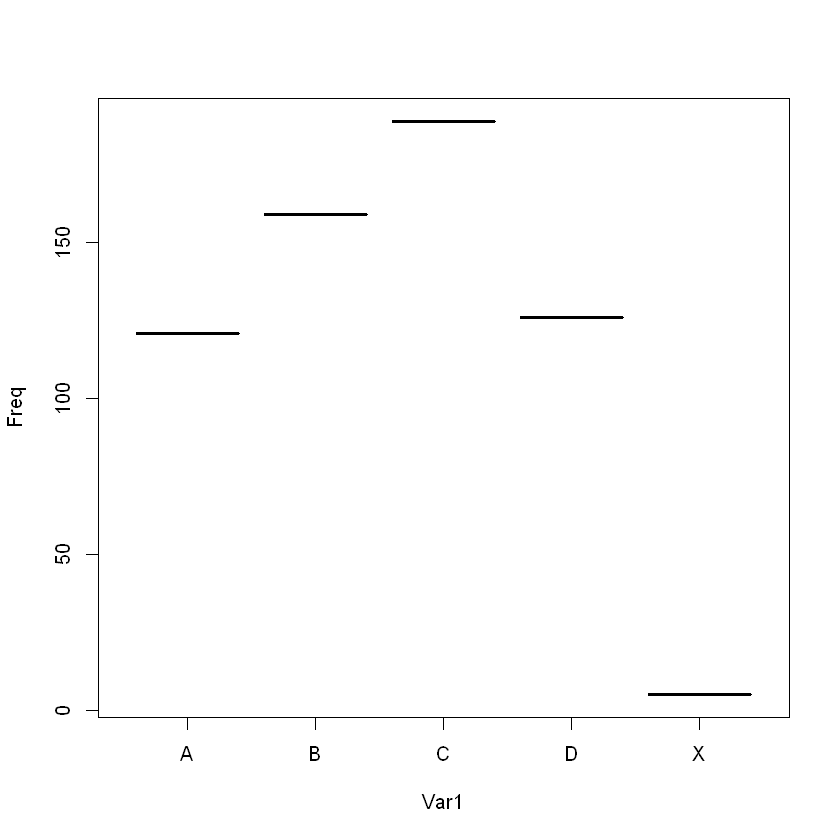

In [82]:
plot(x)

In [69]:
summary(test1_data)

       No            Std                  V          Q1     Q2     Q3    
 Min.   : 1.00   Length:30          Min.   : 1.000   A: 5   A: 5   A: 4  
 1st Qu.: 8.25   Class :character   1st Qu.: 2.000   B: 4   B:16   B: 3  
 Median :15.50   Mode  :character   Median : 4.000   C:15   C: 8   C: 7  
 Mean   :15.50                      Mean   : 4.333   D: 6   D: 1   D:16  
 3rd Qu.:22.75                      3rd Qu.: 6.750   X: 0   X: 0   X: 0  
 Max.   :30.00                      Max.   :10.000                       
 Q4     Q5     Q6     Q7     Q8     Q9    Q10    Q11   Q12    Q13    Q14   
 A: 6   A: 1   A: 6   A: 2   A:11   A:9   A: 9   A:4   A: 3   A: 6   A: 5  
 B: 8   B: 9   B: 8   B:14   B: 1   B:8   B: 8   B:9   B: 4   B: 5   B:10  
 C:10   C: 9   C:13   C: 5   C:10   C:5   C:10   C:9   C:20   C:15   C: 9  
 D: 6   D:11   D: 3   D: 9   D: 8   D:8   D: 3   D:8   D: 3   D: 4   D: 6  
 X: 0   X: 0   X: 0   X: 0   X: 0   X:0   X: 0   X:0   X: 0   X: 0   X: 0  
                          

In [22]:
test_data

Number,Student,Variant,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Фесюк Сергій,3,C,B,C,A,D,B,B,...,B,C,C,B,C,A,B,D,A,B
2,ГРИЦАЮК БОГДАН,8,C,B,D,B,A,B,B,...,A,B,A,C,A,C,D,C,B,C
3,СТАВСЬКИЙ АНДРІЙ,4,A,B,D,B,D,C,B,...,A,C,C,D,A,B,B,B,B,C
4,БАСОК МАКСИМ,4,C,A,D,D,B,C,D,...,D,C,A,C,B,B,D,A,B,C
5,РАДЧУК НАТАЛІЯ,7,C,C,C,C,B,B,C,...,C,C,C,A,B,A,D,D,B,A
6,БОЖЕНКО АНАСТАСІЯ,6,D,B,A,B,B,C,D,...,A,C,D,B,A,D,A,D,D,C
7,АНПІЛОГОВ АНТОН,3,C,C,C,C,C,B,B,...,C,C,C,B,C,B,B,A,A,B
8,ЗЛОЖЕНКО АНДРІЙ,7,C,B,B,C,C,B,D,...,C,C,C,B,B,A,C,D,A,B
9,ГЕРАСИМЧУК НАТАЛІЯ,7,C,C,D,D,C,C,B,...,D,C,C,A,B,-,-,-,-,-
